In [3]:
import datetime
import os
import sys

import pandas as pd

from py_kd_data_common_proj.ds_utils.ds_common_util import init_log_config, init_pandas_setting
from py_kd_data_common_proj.ds_utils.ds_date_util import format_date, delta_time, make_stat_week_day_list

### 出租车上下车信息
    measure: 
        total_amount, tip_amount, tolls_amount, fare_amount, passenger_count
    dim:
        tpep_pickup_datetime: 2020-12-01 00:07:13
        tpep_dropoff_datetime: 2020-12-01 00:18:12
        PULocationID: 138
        DOLocationID: 263

In [4]:
taxi_activity_file_12 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2020/2020-12.csv"
taxi_activity_file_11 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2020/2020-11.csv"
taxi_activity_file_10 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2020/2020-10.csv"
taxi_activity_file_09 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2020/2020-09.csv"
taxi_activity_file_08 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2020/2020-08.csv"
taxi_activity_file_07 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2020/2020-07.csv"
taxi_activity_file_01 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2021/2021-01.csv"
taxi_activity_file_02 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2021/2021-02.csv"
taxi_activity_file_03 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2021/2021-03.csv"
taxi_activity_file_04 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2021/2021-04.csv"
taxi_activity_file_05 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2021/2021-05.csv"
taxi_activity_file_06 = "/Users/qian.jiang/Documents/_AllDocMap/05_Dataset/kylin_demo/data/trip_data_2018-2021/2021/2021-06.csv"

# taxi_df_12 = pd.read_csv(taxi_activity_file_12, low_memory=False)
# taxi_df_11 = pd.read_csv(taxi_activity_file_11, low_memory=False)
# taxi_df_10 = pd.read_csv(taxi_activity_file_10, low_memory=False)
# taxi_df_09 = pd.read_csv(taxi_activity_file_09, low_memory=False)
# taxi_df_08 = pd.read_csv(taxi_activity_file_08, low_memory=False)
# taxi_df_07 = pd.read_csv(taxi_activity_file_07, low_memory=False)
taxi_df_06 = pd.read_csv(taxi_activity_file_06, low_memory=False)
taxi_df_05 = pd.read_csv(taxi_activity_file_05, low_memory=False)
taxi_df_04 = pd.read_csv(taxi_activity_file_04, low_memory=False)
taxi_df_03 = pd.read_csv(taxi_activity_file_03, low_memory=False)
taxi_df_02 = pd.read_csv(taxi_activity_file_02, low_memory=False)
taxi_df_01 = pd.read_csv(taxi_activity_file_01, low_memory=False)

# taxi_df = pd.concat(
#     [taxi_df_01, taxi_df_02, taxi_df_03, taxi_df_04, taxi_df_05, taxi_df_06, taxi_df_07, taxi_df_08, taxi_df_09,
#      taxi_df_10, taxi_df_11,
#      taxi_df_12], axis=0)

taxi_df = pd.concat(
    [taxi_df_01, taxi_df_02, taxi_df_03, taxi_df_04, taxi_df_05, taxi_df_06], axis=0)

In [5]:
taxi_df['pickup_date'] = taxi_df['tpep_pickup_datetime'].map(
    lambda x: str(format_date(x, new_pattern="%Y-%m-%d")))

taxi_df['dropoff_date'] = taxi_df['tpep_dropoff_datetime'].map(
    lambda x: str(format_date(x, new_pattern="%Y-%m-%d")))

taxi_df['elapse_time'] = taxi_df.apply(lambda x: str(delta_time(x['tpep_pickup_datetime'], x['tpep_dropoff_datetime'])),
                                       axis=1)

taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date,dropoff_date,elapse_time
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,3.00,0.5,0.00,0.00,0.3,11.80,2.5,2021-01-01,2021-01-01,0:06:02
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,0.50,0.5,0.00,0.00,0.3,4.30,0.0,2021-01-01,2021-01-01,0:00:59
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,0.50,0.5,8.65,0.00,0.3,51.95,0.0,2021-01-01,2021-01-01,0:27:36
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,0.50,0.5,6.05,0.00,0.3,36.35,0.0,2021-01-01,2021-01-01,0:15:13
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,0.50,0.5,4.06,0.00,0.3,24.36,2.5,2021-01-01,2021-01-01,0:16:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834259,NaN,2021-06-23 07:33:56,2021-06-23 07:42:23,NaN,1.60,NaN,NaN,50,164,NaN,...,0.00,0.5,1.13,0.00,0.3,12.43,2.5,2021-06-23,2021-06-23,0:08:27
2834260,NaN,2021-06-23 07:19:00,2021-06-23 08:03:00,NaN,15.25,NaN,NaN,123,162,NaN,...,2.75,0.5,0.00,6.55,0.3,54.01,0.0,2021-06-23,2021-06-23,0:44:00
2834261,NaN,2021-06-23 07:06:58,2021-06-23 08:06:42,NaN,6.27,NaN,NaN,265,181,NaN,...,0.00,0.5,0.00,0.00,0.3,40.78,0.0,2021-06-23,2021-06-23,0:59:44
2834262,NaN,2021-06-23 07:06:38,2021-06-23 08:06:15,NaN,9.13,NaN,NaN,265,25,NaN,...,0.00,0.5,0.00,0.00,0.3,42.83,0.0,2021-06-23,2021-06-23,0:59:37


### 出租车活动区域
    dim：
        LocationID: 138

In [6]:
taxi_zone_file = "/Users/qian.jiang/workspace4py/JamesPython/_data/kylin_demo/data/taxi_zone/taxi_zone_lookup.csv"

taxi_zone_df = pd.read_csv(taxi_zone_file, low_memory=False)

taxi_zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


### 连接出租车上下车活动信息与活动区域


In [7]:
taxi_pickup_df = taxi_df.join(taxi_zone_df.set_index('LocationID'), how='left', on='PULocationID',
                              lsuffix='_L',
                              rsuffix="_R")

taxi_pickup_df = taxi_pickup_df.join(taxi_zone_df.set_index('LocationID'), how='left', on='DOLocationID',
                                     lsuffix='_PU',
                                     rsuffix="_DO")

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,pickup_date,dropoff_date,elapse_time,Borough_PU,Zone_PU,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,2.5,2021-01-01,2021-01-01,0:06:02,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Central Park,Yellow Zone
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,0.0,2021-01-01,2021-01-01,0:00:59,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Manhattan Valley,Yellow Zone
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,0.0,2021-01-01,2021-01-01,0:27:36,Queens,JFK Airport,Airports,Brooklyn,Midwood,Boro Zone
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,0.0,2021-01-01,2021-01-01,0:15:13,Queens,LaGuardia Airport,Airports,Queens,JFK Airport,Airports
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,2.5,2021-01-01,2021-01-01,0:16:32,Manhattan,East Chelsea,Yellow Zone,Brooklyn,Brooklyn Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834259,NaN,2021-06-23 07:33:56,2021-06-23 07:42:23,NaN,1.60,NaN,NaN,50,164,NaN,...,2.5,2021-06-23,2021-06-23,0:08:27,Manhattan,Clinton West,Yellow Zone,Manhattan,Midtown South,Yellow Zone
2834260,NaN,2021-06-23 07:19:00,2021-06-23 08:03:00,NaN,15.25,NaN,NaN,123,162,NaN,...,0.0,2021-06-23,2021-06-23,0:44:00,Brooklyn,Homecrest,Boro Zone,Manhattan,Midtown East,Yellow Zone
2834261,NaN,2021-06-23 07:06:58,2021-06-23 08:06:42,NaN,6.27,NaN,NaN,265,181,NaN,...,0.0,2021-06-23,2021-06-23,0:59:44,Unknown,NaN,NaN,Brooklyn,Park Slope,Boro Zone
2834262,NaN,2021-06-23 07:06:38,2021-06-23 08:06:15,NaN,9.13,NaN,NaN,265,25,NaN,...,0.0,2021-06-23,2021-06-23,0:59:37,Unknown,NaN,NaN,Brooklyn,Boerum Hill,Boro Zone


### 选取第 9999 行

In [8]:
taxi_pickup_df.iloc[9999]

VendorID                                   1.0
tpep_pickup_datetime       2021-01-01 13:26:43
tpep_dropoff_datetime      2021-01-01 13:31:59
passenger_count                            2.0
trip_distance                              0.7
RatecodeID                                 1.0
store_and_fwd_flag                           N
PULocationID                               262
DOLocationID                               236
payment_type                               1.0
fare_amount                                5.5
extra                                      2.5
mta_tax                                    0.5
tip_amount                                1.75
tolls_amount                               0.0
improvement_surcharge                      0.3
total_amount                             10.55
congestion_surcharge                       2.5
pickup_date                         2021-01-01
dropoff_date                        2021-01-01
elapse_time                            0:05:16
Borough_PU   

### 选取第 9999 行的指定列

In [9]:
taxi_pickup_df.loc[
    9999, ['pickup_date', 'total_amount', 'trip_distance', 'passenger_count', 'elapse_time', 'tpep_pickup_datetime',
           'pickup_date', 'Zone_PU', 'tpep_dropoff_datetime', 'dropoff_date', 'Zone_DO']]

,pickup_date,total_amount,trip_distance,passenger_count,elapse_time,tpep_pickup_datetime,pickup_date,Zone_PU,tpep_dropoff_datetime,dropoff_date,Zone_DO
9999,2021-01-01,10.55,0.70,2.0,0:05:16,2021-01-01 13:26:43,2021-01-01,Yorkville East,2021-01-01 13:31:59,2021-01-01,Upper East Side North
9999,2021-02-02,9.80,1.10,1.0,0:05:02,2021-02-02 10:50:56,2021-02-02,Gramercy,2021-02-02 10:55:58,2021-02-02,Murray Hill
9999,2021-03-01,13.50,1.63,1.0,0:07:03,2021-03-01 09:40:20,2021-03-01,Union Sq,2021-03-01 09:47:23,2021-03-01,Times Sq/Theatre District
9999,2021-04-01,16.80,0.36,1.0,0:02:23,2021-04-01 09:37:26,2021-04-01,Midtown Center,2021-04-01 09:39:49,2021-04-01,Murray Hill
9999,2021-05-01,11.15,1.10,1.0,0:05:41,2021-05-01 09:41:14,2021-05-01,Central Park,2021-05-01 09:46:55,2021-05-01,Upper West Side South
9999,2021-06-01,13.56,1.82,1.0,0:08:42,2021-06-01 08:19:34,2021-06-01,Union Sq,2021-06-01 08:28:16,2021-06-01,Midtown East


In [10]:
taxi_pickup_df.loc[:,
['pickup_date', 'total_amount', 'trip_distance', 'passenger_count', 'elapse_time', 'tpep_pickup_datetime',
 'pickup_date', 'Zone_PU', 'tpep_dropoff_datetime', 'dropoff_date', 'Zone_DO']]

,pickup_date,total_amount,trip_distance,passenger_count,elapse_time,tpep_pickup_datetime,pickup_date,Zone_PU,tpep_dropoff_datetime,dropoff_date,Zone_DO
0,2021-01-01,11.80,2.10,1.0,0:06:02,2021-01-01 00:30:10,2021-01-01,Lincoln Square East,2021-01-01 00:36:12,2021-01-01,Central Park
1,2021-01-01,4.30,0.20,1.0,0:00:59,2021-01-01 00:51:20,2021-01-01,Upper West Side North,2021-01-01 00:52:19,2021-01-01,Manhattan Valley
2,2021-01-01,51.95,14.70,1.0,0:27:36,2021-01-01 00:43:30,2021-01-01,JFK Airport,2021-01-01 01:11:06,2021-01-01,Midwood
3,2021-01-01,36.35,10.60,0.0,0:15:13,2021-01-01 00:15:48,2021-01-01,LaGuardia Airport,2021-01-01 00:31:01,2021-01-01,JFK Airport
4,2021-01-01,24.36,4.94,1.0,0:16:32,2021-01-01 00:31:49,2021-01-01,East Chelsea,2021-01-01 00:48:21,2021-01-01,Brooklyn Heights
...,...,...,...,...,...,...,...,...,...,...,...
2834259,2021-06-23,12.43,1.60,NaN,0:08:27,2021-06-23 07:33:56,2021-06-23,Clinton West,2021-06-23 07:42:23,2021-06-23,Midtown South
2834260,2021-06-23,54.01,15.25,NaN,0:44:00,2021-06-23 07:19:00,2021-06-23,Homecrest,2021-06-23 08:03:00,2021-06-23,Midtown East
2834261,2021-06-23,40.78,6.27,NaN,0:59:44,2021-06-23 07:06:58,2021-06-23,NaN,2021-06-23 08:06:42,2021-06-23,Park Slope
2834262,2021-06-23,42.83,9.13,NaN,0:59:37,2021-06-23 07:06:38,2021-06-23,NaN,2021-06-23 08:06:15,2021-06-23,Boerum Hill


### 日期维表
    day_start date,
    month_start date,
    quarter_start date,
    year_start date,
    month_en string,
    day_of_year int,
    week_of_year int

In [11]:
calendar_file = "/Users/qian.jiang/workspace4py/JamesPython/_data/kylin_demo/data/lookup_calendar/kylin_cal.csv"

cal_df = pd.read_csv(calendar_file, low_memory=False)

cal_df

,day_start,month_start,quarter_start,year_start,month_en,day_of_year,week_of_year
0,2010-01-01,2010-01-01,2010-01-01,2010-01-01,Jan,2,1
1,2010-01-02,2010-01-01,2010-01-01,2010-01-01,Jan,2,1
2,2010-01-03,2010-01-01,2010-01-01,2010-01-01,Jan,3,1
3,2010-01-04,2010-01-01,2010-01-01,2010-01-01,Jan,4,1
4,2010-01-05,2010-01-01,2010-01-01,2010-01-01,Jan,5,1
...,...,...,...,...,...,...,...
4738,2022-12-27,2022-12-01,2022-10-01,2022-01-01,Dec,361,52
4739,2022-12-28,2022-12-01,2022-10-01,2022-01-01,Dec,362,52
4740,2022-12-29,2022-12-01,2022-10-01,2022-01-01,Dec,363,52
4741,2022-12-30,2022-12-01,2022-10-01,2022-01-01,Dec,364,53


### 连接出租车上下车信息：上下车信息、区域、日期

In [12]:
taxi_pickup_df = taxi_pickup_df.join(cal_df.set_index('day_start'), how='left', on='pickup_date',
                                     lsuffix='_L',
                                     rsuffix="_R")

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO,month_start,quarter_start,year_start,month_en,day_of_year,week_of_year
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,Yellow Zone,Manhattan,Central Park,Yellow Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,Yellow Zone,Manhattan,Manhattan Valley,Yellow Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,Airports,Brooklyn,Midwood,Boro Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,Airports,Queens,JFK Airport,Airports,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,Yellow Zone,Brooklyn,Brooklyn Heights,Boro Zone,2021-01-01,2021-01-01,2021-01-01,Jan,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834259,NaN,2021-06-23 07:33:56,2021-06-23 07:42:23,NaN,1.60,NaN,NaN,50,164,NaN,...,Yellow Zone,Manhattan,Midtown South,Yellow Zone,2021-06-01,2021-04-01,2021-01-01,Jun,174.0,26.0
2834260,NaN,2021-06-23 07:19:00,2021-06-23 08:03:00,NaN,15.25,NaN,NaN,123,162,NaN,...,Boro Zone,Manhattan,Midtown East,Yellow Zone,2021-06-01,2021-04-01,2021-01-01,Jun,174.0,26.0
2834261,NaN,2021-06-23 07:06:58,2021-06-23 08:06:42,NaN,6.27,NaN,NaN,265,181,NaN,...,NaN,Brooklyn,Park Slope,Boro Zone,2021-06-01,2021-04-01,2021-01-01,Jun,174.0,26.0
2834262,NaN,2021-06-23 07:06:38,2021-06-23 08:06:15,NaN,9.13,NaN,NaN,265,25,NaN,...,NaN,Brooklyn,Boerum Hill,Boro Zone,2021-06-01,2021-04-01,2021-01-01,Jun,174.0,26.0


In [13]:
### 按照日期排序

In [14]:
taxi_pickup_df = taxi_pickup_df.sort_values(axis=0, by=['pickup_date'], ascending=True)

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO,month_start,quarter_start,year_start,month_en,day_of_year,week_of_year
1984018,2.0,2008-12-31 23:31:09,2008-12-31 23:44:21,6.0,1.77,1.0,N,162,234,2.0,...,Yellow Zone,Manhattan,Union Sq,Yellow Zone,NaN,NaN,NaN,NaN,NaN,NaN
1092212,2.0,2008-12-31 23:09:29,2008-12-31 23:28:42,1.0,2.45,1.0,N,161,140,2.0,...,Yellow Zone,Manhattan,Lenox Hill East,Yellow Zone,NaN,NaN,NaN,NaN,NaN,NaN
1984017,2.0,2008-12-31 23:15:05,2008-12-31 23:25:38,6.0,2.11,1.0,N,141,233,2.0,...,Yellow Zone,Manhattan,UN/Turtle Bay South,Yellow Zone,NaN,NaN,NaN,NaN,NaN,NaN
1096141,2.0,2008-12-31 23:44:45,2008-12-31 23:53:03,1.0,1.49,1.0,N,239,237,2.0,...,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone,NaN,NaN,NaN,NaN,NaN,NaN
1096142,2.0,2008-12-31 23:58:02,2009-01-01 00:02:00,1.0,0.58,1.0,N,237,262,2.0,...,Yellow Zone,Manhattan,Yorkville East,Yellow Zone,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567152,2.0,2021-12-15 15:00:19,2021-12-15 15:09:54,1.0,1.77,1.0,N,79,233,1.0,...,Yellow Zone,Manhattan,UN/Turtle Bay South,Yellow Zone,2021-12-01,2021-10-01,2021-01-01,Dec,349.0,51.0
567154,2.0,2021-12-15 15:24:08,2021-12-15 23:10:05,1.0,7.80,2.0,N,163,95,1.0,...,Yellow Zone,Queens,Forest Hills,Boro Zone,2021-12-01,2021-10-01,2021-01-01,Dec,349.0,51.0
567150,2.0,2021-12-15 14:37:15,2021-12-15 14:44:55,1.0,0.78,1.0,N,107,234,1.0,...,Yellow Zone,Manhattan,Union Sq,Yellow Zone,2021-12-01,2021-10-01,2021-01-01,Dec,349.0,51.0
567153,2.0,2021-12-15 15:13:23,2021-12-15 15:21:36,1.0,1.23,1.0,N,233,163,1.0,...,Yellow Zone,Manhattan,Midtown North,Yellow Zone,2021-12-01,2021-10-01,2021-01-01,Dec,349.0,51.0


In [15]:
daily_count_df = taxi_pickup_df.groupby(['pickup_date', 'Zone_PU'])['total_amount'].count()
daily_count_df = daily_count_df.reset_index(name='cnt')
daily_count_df

,pickup_date,Zone_PU,cnt
0,2008-12-31,Central Park,1
1,2008-12-31,East Harlem South,1
2,2008-12-31,Erasmus,1
3,2008-12-31,Lenox Hill West,1
4,2008-12-31,Lincoln Square West,1
...,...,...,...
42259,2021-12-15,Gramercy,1
42260,2021-12-15,Midtown North,1
42261,2021-12-15,UN/Turtle Bay South,1
42262,2021-12-15,Union Sq,1


In [16]:
sort_by_cnt_df = daily_count_df.groupby(['Zone_PU'])['cnt'].count()
sort_by_cnt_df = sort_by_cnt_df.reset_index(name='cnt')
sort_by_cnt_df = sort_by_cnt_df.sort_values(axis=0, by=['cnt'], ascending=False)
sort_by_cnt_df

,Zone_PU,cnt
226,Sutton Place/Turtle Bay North,186
158,Midtown North,186
231,Union Sq,185
165,Murray Hill,185
228,TriBeCa/Civic Center,185
...,...,...
173,Oakwood,8
126,Jamaica Bay,7
99,Governor's Island/Ellis Island/Liberty Island,3
196,Rikers Island,3


In [17]:
all_dims = list(daily_count_df['Zone_PU'].unique())

all_dims

['Central Park',
 'East Harlem South',
 'Erasmus',
 'Lenox Hill West',
 'Lincoln Square West',
 'Midtown Center',
 'Midtown East',
 'Queensbridge/Ravenswood',
 'Sutton Place/Turtle Bay North',
 'Union Sq',
 'Upper East Side South',
 'Upper West Side South',
 'Baisley Park',
 'Battery Park City',
 'Bloomingdale',
 'Central Harlem',
 'Chinatown',
 'Clinton East',
 'East Chelsea',
 'East Harlem North',
 'East Village',
 'Gramercy',
 'Greenwich Village South',
 'Hamilton Heights',
 'JFK Airport',
 'Jackson Heights',
 'Kips Bay',
 'Lenox Hill East',
 'Lincoln Square East',
 'Little Italy/NoLiTa',
 'Midtown North',
 'Midtown South',
 'Morningside Heights',
 'Murray Hill',
 'NV',
 'Penn Station/Madison Sq West',
 'Prospect-Lefferts Gardens',
 'UN/Turtle Bay South',
 'Upper East Side North',
 'West Concourse',
 'West Village',
 'Yorkville East',
 'Yorkville West',
 'Central Harlem North',
 'Flatiron',
 'TriBeCa/Civic Center',
 'Allerton/Pelham Gardens',
 'Alphabet City',
 'Astoria',
 'Astoria 

### 绘制趋势图

------------------------------------------------------------
      pickup_date        Zone_PU  cnt  cnt_zscore
126    2021-01-01  East New York   34   -1.029575
349    2021-01-02  East New York   45   -0.383332
575    2021-01-03  East New York   38   -0.794577
800    2021-01-04  East New York   50   -0.089585
1037   2021-01-05  East New York   54    0.145413
...           ...            ...  ...         ...
41117  2021-06-26  East New York   30   -1.264572
41352  2021-06-27  East New York   24   -1.617068
41583  2021-06-28  East New York   22   -1.734567
41812  2021-06-29  East New York   38   -0.794577
42042  2021-06-30  East New York   27   -1.440820

[181 rows x 4 columns]

------------------------------------------------------------
     pickup_date        Zone_PU  cnt  cnt_zscore
61    2021-01-01  East New York   34   -1.355827
287   2021-01-08  East New York   79    1.130565
521   2021-01-15  East New York   76    0.964805
751   2021-01-22  East New York   70    0.633286
988   20

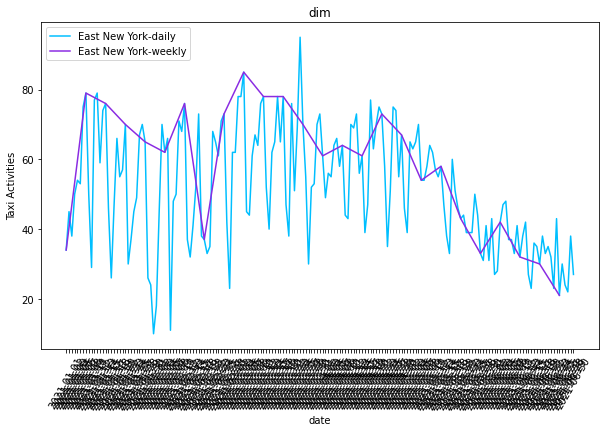

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 赋值 dataframe
data = daily_count_df

data_week = data.copy()

TITLE = 'dim'
Y_LABEL = 'Taxi Activities'
fig = plt.figure(figsize=(10, 6))

colors = ['deepskyblue', 'blueviolet', 'peru', 'brown', 'black', 'red', 'gold', 'darkorange']

DIM_DATE_NAME = 'pickup_date'
DIM_NAME = 'Zone_PU'
MES_CNT_NAME = 'cnt'

dims = all_dims
dims = ['East New York']

# 生成周同比数据
stat_week_day_str_list = make_stat_week_day_list('2021-07-30', -1, 7, 52)

if len(stat_week_day_str_list) != 0:
    data_week = data[data.pickup_date.isin(stat_week_day_str_list)]

data_week = data_week.groupby([DIM_DATE_NAME, DIM_NAME])[MES_CNT_NAME].sum()
data_week = data_week.reset_index(name='cnt')

# 绘图
i = 0
for dim in dims:
    subset = data[data.Zone_PU.isin([dim])]
    subset = subset.sort_values(axis=0, by=[DIM_DATE_NAME, DIM_NAME], ascending=True)
    print('-' * 60)
    cnt_zscore = zscore(subset[MES_CNT_NAME])
    subset['cnt_zscore'] = cnt_zscore
    print(subset)
    print('')
    plt.plot(subset[DIM_DATE_NAME], subset[MES_CNT_NAME], c=colors[i], label=f"{dim}-daily")
    i = (i + 1) % 8

    subset_week = data_week[data_week.Zone_PU.isin([dim])]
    subset_week = subset_week.sort_values(axis=0, by=[DIM_DATE_NAME, DIM_NAME], ascending=True)
    print('-' * 60)
    cnt_zscore_week = zscore(subset_week[MES_CNT_NAME])
    subset_week['cnt_zscore'] = cnt_zscore_week
    print(subset_week)
    print('')
    plt.plot(subset_week[DIM_DATE_NAME], subset_week[MES_CNT_NAME], c=colors[i], label=f"{dim}-weekly")
    i = (i + 1) % 8

plt.legend(loc='upper left')
plt.title(TITLE)
plt.ylabel(Y_LABEL)
plt.xlabel('date')
plt.xticks(rotation=60)
plt.show()